In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


### Data set "Animals"

[Animals dataset](https://stat.ethz.ch/R-manual/R-patched/library/MASS/html/Animals.html)

Average brain and body weights for 28 species of land animals.

In [12]:
url = 'https://drive.google.com/file/d/1wfUUKU2VbmK-WzehMKft8u1WMEfyOXTy/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

In [13]:
data = pd.read_csv(dwn_url, header=0, index_col=0)

- We want to use a linear model to study the relation between the brain weight and the body weight

- Simple linear regression (one predictor):

$brain=\beta_0+\beta_1*body+\varepsilon$


### Regression assumption on Y

- Our model: $Y=\beta_0+\beta_1*x+\varepsilon$

- Given that we assume the errors $\varepsilon$ to have normal distribution $\mathcal{N}(0,\sigma^2)$, we assume that also $Y$ are normally distributed.

- Check the assumption on $Y$

- If the response variable is not gaussian, a linear model should not be used.



### Transformations

Apply the necessary transformations to Y and X, use log tranformation.

In [14]:
#Apply the necessary transformations to the data
data['log_brain'] = np.log(data['brain'])
data['log_body'] = np.log(data['body'])


### Outliers

Detect the outliers using boxplots, histograms or scatter plots. Findout which are the animals corresponding to the outliers.

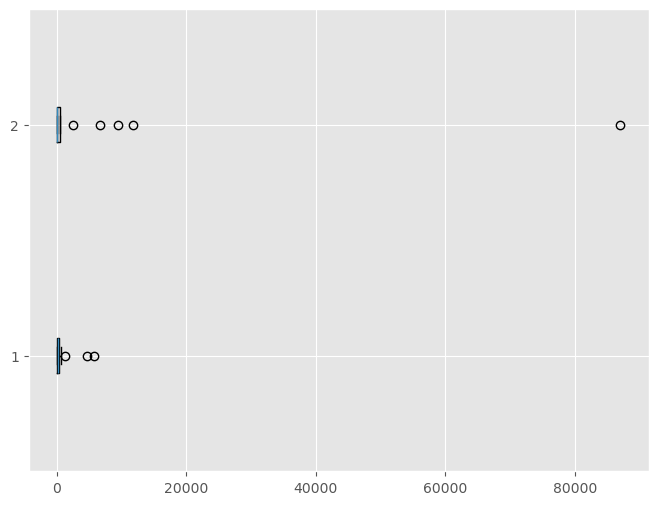

In [15]:
#Detect the outliers using boxplot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(data[['brain', 'body']], vert=False)
plt.show()



## Linear regression 1

Apply a simple linear regression using the model:

$\log(brain)=\beta_0+\beta_1*log(body)+\varepsilon $

In [16]:
import statsmodels.api as sm
xc = sm.add_constant(data['log_body'])
model = sm.OLS(data['log_brain'], data['log_body'])

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_brain   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              99.10
Date:                Fri, 16 Aug 2024   Prob (F-statistic):                    1.56e-10
Time:                        21:02:26   Log-Likelihood:                         -63.293
No. Observations:                  28   AIC:                                      128.6
Df Residuals:                      27   BIC:                                      129.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
results.params

log_body    0.84094
dtype: float64

Denoting with $Y_i$ the observations and with $\hat{Y_i}$ the estimations, the residuals are:

$residuals=|Y_i-\hat{Y_i}|$


Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?

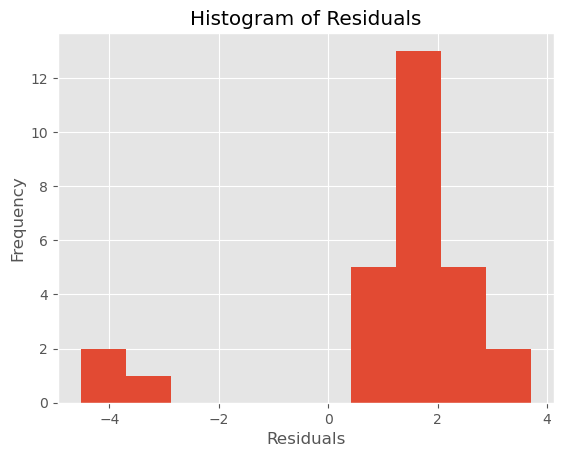

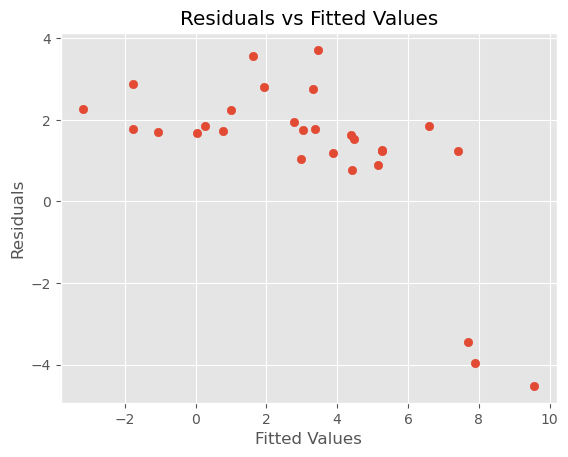

In [18]:
#Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?
# Draw an histogram of the residuals
plt.hist(results.resid, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Scatter plot of residuals vs fitted values
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Draw the regression line on the X,Y scatter plot.

/var/folders/wg/0ry_2kxj1cjg6v6gw1kzvv_40000gn/T/ipykernel_86624/1644374036.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yy = data['log_body'] * results.params[0]


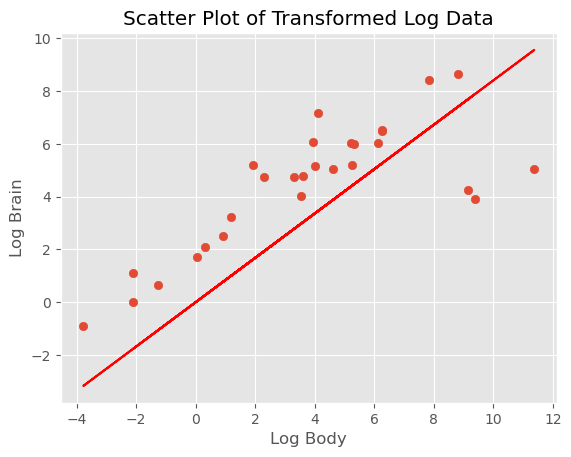

In [19]:
fig, ax = plt.subplots()
yy = data['log_body'] * results.params[0]

# Scatter plot
ax.scatter(data['log_body'], data['log_brain'])

# Set labels and title
ax.set_xlabel('Log Body')
ax.set_ylabel('Log Brain')
ax.set_title('Scatter Plot of Transformed Log Data')

# Plot the line
ax.plot(data['log_body'], yy, color='red')

# Show the plot
plt.show()


### Dummy variables

Should I treat dinosaurs independently? One can make the dataset more interesting introducing dummy variables, one for each type of dinosaurs.

Create four dummy variables: one for Triceratops, one for Dipliodocus, one for Brachiosaurus and one for dinosaur in general.


### Regression model with dummy variables: Linear regression 2

- New model with extra predictors:

$log(brain)=\beta_0+\beta_1*log(body)+\beta_2*DummyT+\beta_3*DummyD+\beta_4*DummyB+\varepsilon$

- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.

$\log(brain)=\beta_0+\beta_1*log(body)+\beta_2=$

$(\beta_0+\beta_2)+\beta_1*log(body)$

The intercept is $\beta_0$ when the animal is not a triceratop, while it's $\beta_0+\beta_2$ when the animal is a triceratop.

With this model we consider three different intercepts for the three dinosaurs.



In [20]:
"""
### Regression model with dummy variables: Linear regression 2

- New model with extra predictors:

$log(brain)=\beta_0+\beta_1*log(body)+\beta_2*DummyT+\beta_3*DummyD+\beta_4*DummyB+\varepsilon$

- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.

$\log(brain)=\beta_0+\beta_1*log(body)+\beta_2=$

$(\beta_0+\beta_2)+\beta_1*log(body)$

The intercept is $\beta_0$ when the animal is not a triceratop, while it's $\beta_0+\beta_2$ when the animal is a triceratop.

With this model we consider three different intercepts for the three dinosaurs.
"""


<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
/var/folders/wg/0ry_2kxj1cjg6v6gw1kzvv_40000gn/T/ipykernel_86624/3376941260.py:1: SyntaxWarning: invalid escape sequence '\l'
  """


"\n### Regression model with dummy variables: Linear regression 2\n\n- New model with extra predictors:\n\n$log(brain)=\x08eta_0+\x08eta_1*log(body)+\x08eta_2*DummyT+\x08eta_3*DummyD+\x08eta_4*DummyB+\x0barepsilon$\n\n- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.\n\n$\\log(brain)=\x08eta_0+\x08eta_1*log(body)+\x08eta_2=$\n\n$(\x08eta_0+\x08eta_2)+\x08eta_1*log(body)$\n\nThe intercept is $\x08eta_0$ when the animal is not a triceratop, while it's $\x08eta_0+\x08eta_2$ when the animal is a triceratop.\n\nWith this model we consider three different intercepts for the three dinosaurs.\n"

### Linear regression 3

- Model 2: same rate of change, but different intercept for dinasaurs

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\varepsilon$

 For an animal different from a dinosaur, the intercept is $\beta_0$. For a dinosaur the intercept is $\beta_0+\beta_2$.




 Linear regression 4

 Different intercept and slope for dinosaurs. We add the feature where we multiply the variables "Dino" and "log(body)".

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\beta_3*log(body)*Dino+\varepsilon$

For an animal other than a dinosaur, the intercept is $\beta_0$ and the slope $\beta_1$. For a dinosaur, the intercept is $\beta_0+\beta_2$ and the slope is $\beta_1+\beta_3$.

Which is the best model?